In [1]:
import networkx as nx # Networkx Library
import matplotlib.pyplot as plt # Matplot lib

In [2]:
# Takes vertices of the graph as input
vertices =[];
print("Enter the vertex")
while True:
    vertices.append(input(" >>>"))
    print("Want to enter another vertex? Y/N")
    counter = input(" >>>")
    if(counter != 'Y'):
        break;
vertices; # Gives a list of vertices in graph

Enter the vertex
 >>>a
Want to enter another vertex? Y/N
 >>>Y
 >>>b
Want to enter another vertex? Y/N
 >>>Y
 >>>c
Want to enter another vertex? Y/N
 >>>Y
 >>>d
Want to enter another vertex? Y/N
 >>>Y
 >>>e
Want to enter another vertex? Y/N
 >>>N


In [3]:
edges = [];
print("Enter the edge")
while True:
    vertex1 = input(" >>>")
    vertex2 = input(" >>>")
    edges.append((vertex1,vertex2))
    print("Want to enter another vertex? Y/N")
    counter = input(" >>>")
    if(counter != 'Y'):
        break;
edges
    

Enter the edge
 >>>a
 >>>d
Want to enter another vertex? Y/N
 >>>Y
 >>>a
 >>>b
Want to enter another vertex? Y/N
 >>>Y
 >>>a
 >>>e
Want to enter another vertex? Y/N
 >>>Y
 >>>b
 >>>c
Want to enter another vertex? Y/N
 >>>Y
 >>>b
 >>>e
Want to enter another vertex? Y/N
 >>>Y
 >>>c
 >>>d
Want to enter another vertex? Y/N
 >>>Y
 >>>c
 >>>e
Want to enter another vertex? Y/N
 >>>Y
 >>>d
 >>>e
Want to enter another vertex? Y/N
 >>>N


[('a', 'd'),
 ('a', 'b'),
 ('a', 'e'),
 ('b', 'c'),
 ('b', 'e'),
 ('c', 'd'),
 ('c', 'e'),
 ('d', 'e')]

/home/sumit/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))
/home/sumit/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


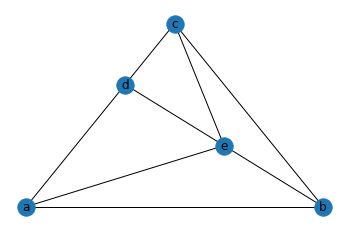

In [4]:
#Graph Initialisation(Will be converted into an interface later)
G = nx.Graph() 
G.add_nodes_from(vertices)
G.add_edges_from(edges)
#Draws our PTP Graph
plt.subplot(111)
nx.draw_planar(G, with_labels = True)
plt.show()

In [5]:
# Conversion to directed
H = G.to_directed()

In [6]:
# Get all triangles
all_cycles = list(nx.simple_cycles(H))
all_triangles = []
for cycle in all_cycles:
     if(len(cycle) == 3):
             all_triangles.append(cycle)
all_triangles #Contains all triangles in PTP graph

[['b', 'e', 'c'],
 ['b', 'e', 'a'],
 ['b', 'c', 'e'],
 ['b', 'a', 'e'],
 ['c', 'e', 'd'],
 ['c', 'd', 'e'],
 ['a', 'e', 'd'],
 ['a', 'd', 'e']]

In [7]:
# Get edges on outer boundary
outer_boundary = []
for edge in H.edges:
	count = 0
	for triangle in all_triangles:
		if(edge[0] in triangle and edge[1] in triangle):
			count += 1
	if(count == 2):
		outer_boundary.append(edge)
outer_boundary #Contains the outer boundary of PTP Graph

[('a', 'd'),
 ('a', 'b'),
 ('b', 'a'),
 ('b', 'c'),
 ('c', 'b'),
 ('c', 'd'),
 ('d', 'a'),
 ('d', 'c')]

In [8]:
# Get Vertex-Set of outerboundary
outer_vertices = []
for edge in outer_boundary:
	if(edge[0] not in outer_vertices):
		outer_vertices.append(edge[0])
	if(edge[1] not in outer_vertices):
		outer_vertices.append(edge[1])
outer_vertices #Contains vertices containing outer vertices of PTP Graph

['a', 'd', 'b', 'c']

In [9]:
# Get top,left,right and bottom boundaries of graph
corner_implying_paths = []
loop_count = 0
while len(outer_vertices)>1:
	temp=[]
	temp.append(outer_vertices[0])
	outer_vertices.pop(0)
	for vertices in temp:
		for vertex in outer_vertices:
			temp1 = temp.copy()
			temp1.pop(len(temp)-1)
			if((temp[len(temp)-1],vertex) in outer_boundary):
				temp.append(vertex)
				outer_vertices.remove(vertex)		
				if(temp1 is not None):
					for vertex1 in temp1:
						if((vertex1,vertex) in H.edges):
							temp.remove(vertex)
							outer_vertices.append(vertex)
	corner_implying_paths.append(temp)
	outer_vertices.insert(0,temp[len(temp)-1])
	if(len(outer_vertices) == 1 and loop_count == 0):
		outer_vertices.append(corner_implying_paths[0][0])
		loop_count += 1

def create_cip ( index ):
	corner_implying_paths.insert(index+1,corner_implying_paths[index])
	corner_implying_paths[index] = corner_implying_paths[index][0:2]
	del corner_implying_paths[index+1][0:1]


if(len(corner_implying_paths) == 5):
    check = True
    for vertex in corner_implying_paths[0]:
        if((corner_implying_paths[4][0],vertex)in H.edges):
            check = False
            break
    if(check):
        corner_implying_paths[0] = corner_implying_paths[4] + list(set(corner_implying_paths[0]) - set(corner_implying_paths[4]))
        corner_implying_paths.pop()
    else
        corner_implying_paths[3] = corner_implying_paths[3] + corner_implying_paths[4]
        corner_implying_paths.pop()

if(len(corner_implying_paths) == 3):
	index = corner_implying_paths.index(max(corner_implying_paths,key =len))
	create_cip(index)

if(len(corner_implying_paths) == 2):
	index = corner_implying_paths.index(max(corner_implying_paths,key =len))
	create_cip(index)
	create_cip(index+1)
corner_implying_paths    #Gives boundaries of PTP Graph


[['a', 'd'], ['d', 'c'], ['c', 'b'], ['b', 'a']]

In [11]:
#Adding north, south, east and west vertices and connects them to boundary vertices 
	
G.add_nodes_from(["North","South","East","West"])


def news_edges( cip , vertex ):
	"This adds north,east,south,west"
	for vertices in cip:
		G.add_edge(vertex,vertices)

news_edges(corner_implying_paths[0],'North')
news_edges(corner_implying_paths[1],'East')
news_edges(corner_implying_paths[2],'South')
news_edges(corner_implying_paths[3],'West')


G.add_edges_from([('North','West'),('West','South'),('South','East'),('East','North')])

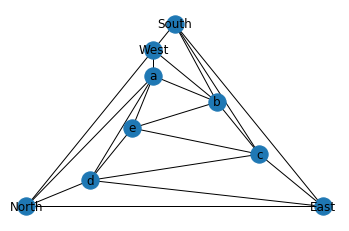

In [13]:
#Creates new graph
plt.subplot(111)
nx.draw_planar(G, with_labels=True)
plt.show()

In [ ]:
#For example 1
G.add_nodes_from(["a","b","c","d","e","f","g","h","i","j"])
G.add_edges_from([("a","b"),("a","d"),("a","f"),("a","g"),("a","j"),("b","c"),("b","d"),("b","g"),("b","h"),("c","d"),("c","h"),("c","e"),("d","e"),("d","f"),("e","f"),("e","i"),("e","j"),("f","j"),("i","j")])

#For example 2
G.add_nodes_from(["a","b","c","d","e"])
G.add_edges_from([("a","d"),("a","b"),("a","e"),("b","c"),("b","e"),("c","d"),("c","e"),("d","e")])

In [10]:
a = ['a','b','c','d']
b = ['e','f']
c = a + b
c

['a', 'b', 'c', 'd', 'e', 'f']